## SALES TRANSACTIONS 

Hemant Thapa

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.express as px

#### IMPORTING LIBRARIES

In [172]:
df = pd.read_csv('SalesTransactions.csv', low_memory=False)

In [173]:
df.head(2)

,Region,General Ledger Account,Transcation Type,Customer Number,Sales Order Number,Invoice Number,Sales Order Date,US Gaap Recognition Date,IFRS Recognition Date,Item Number,...,Amount,Customer Name,Customer Industry,Item Category,Item Range,Region Name,Region Currency,Transaction Type Name,Account Name,Account Multiplier
0,EUR,10100,STD,400900,787710,10506296,25/02/2018,08/03/2018,17/04/2018,TH00000014,...,250,"O'Reilly, Kuhn and Jaskolski",FMCG,Tire,Budget,Europe,GBP,Standard,Revenue,1
1,EUR,10100,STD,400900,787291,10505406,03/11/2019,07/11/2019,15/12/2019,TH00000014,...,166,"O'Reilly, Kuhn and Jaskolski",FMCG,Tire,Budget,Europe,GBP,Standard,Revenue,1


## 1. PRE PROCESSING

#### CHECKING ROW AND COLUMNS

In [174]:
df.shape

(383500, 21)

We have nearly 383500 rows and 21 columns

#### CHECKING MISSING VALUES

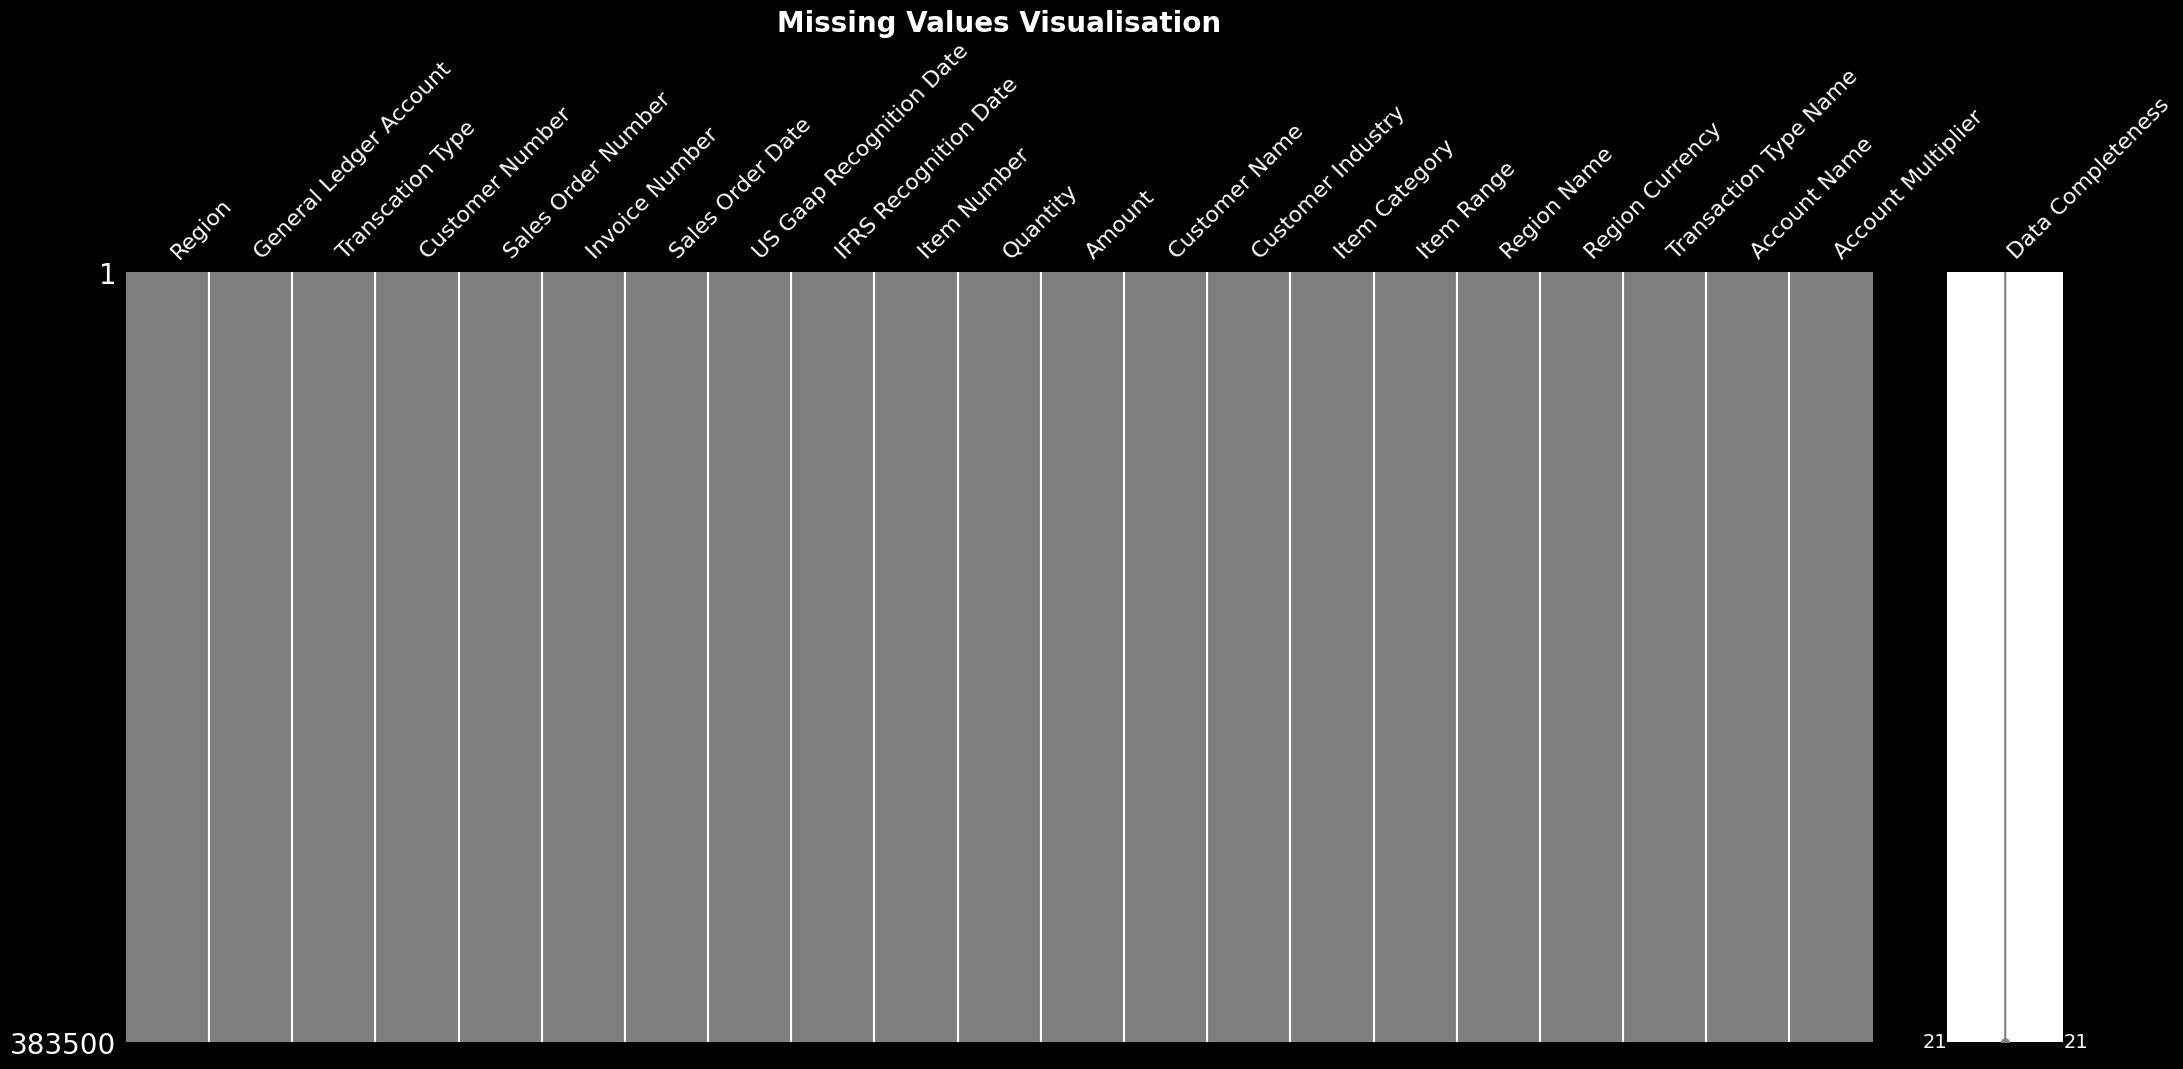

In [175]:
msno.matrix(df, color=(0.5, 0.5, 0.5), labels=True)
plt.title('Missing Values Visualisation', fontsize=20, fontweight='bold')
plt.show()

There is no missing values into this dataset and there will be good accuracy on result

In [176]:
df.isnull().sum()

Region                      0
General Ledger Account      0
Transcation Type            0
Customer Number             0
Sales Order Number          0
Invoice Number              0
Sales Order Date            0
US Gaap Recognition Date    0
IFRS Recognition Date       0
Item Number                 0
Quantity                    0
Amount                      0
Customer Name               0
Customer Industry           0
Item Category               0
Item Range                  0
Region Name                 0
Region Currency             0
Transaction Type Name       0
Account Name                0
Account Multiplier          0
dtype: int64

#### CHECKING UNIQUE COLUMNS

In [177]:
df.columns

Index(['Region', 'General Ledger Account', 'Transcation Type',
       'Customer Number', 'Sales Order Number', 'Invoice Number',
       'Sales Order Date', 'US Gaap Recognition Date', 'IFRS Recognition Date',
       'Item Number', 'Quantity', 'Amount', 'Customer Name',
       'Customer Industry', 'Item Category', 'Item Range', 'Region Name',
       'Region Currency', 'Transaction Type Name', 'Account Name',
       'Account Multiplier'],
      dtype='object')

These are the unique columns of the dataset

#### CONVERTING ALL DATA INTO LOWER CASE

In [178]:
df.columns = df.columns.str.lower()
df.columns

Index(['region', 'general ledger account', 'transcation type',
       'customer number', 'sales order number', 'invoice number',
       'sales order date', 'us gaap recognition date', 'ifrs recognition date',
       'item number', 'quantity', 'amount', 'customer name',
       'customer industry', 'item category', 'item range', 'region name',
       'region currency', 'transaction type name', 'account name',
       'account multiplier'],
      dtype='object')

#### CONVERTING COLUMNS INTO SNAKE CASE

In [179]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['region', 'general_ledger_account', 'transcation_type',
       'customer_number', 'sales_order_number', 'invoice_number',
       'sales_order_date', 'us_gaap_recognition_date', 'ifrs_recognition_date',
       'item_number', 'quantity', 'amount', 'customer_name',
       'customer_industry', 'item_category', 'item_range', 'region_name',
       'region_currency', 'transaction_type_name', 'account_name',
       'account_multiplier'],
      dtype='object')

In [180]:
df.tail(2)

,region,general_ledger_account,transcation_type,customer_number,sales_order_number,invoice_number,sales_order_date,us_gaap_recognition_date,ifrs_recognition_date,item_number,...,amount,customer_name,customer_industry,item_category,item_range,region_name,region_currency,transaction_type_name,account_name,account_multiplier
383498,SAM,10100,STD,1077,3778212,320033967,08/02/2018,09/02/2018,25/02/2018,AP00001028,...,200,"Feest, Ruecker and Kihn",Legal,Axle,Premium,South America,BRL,Standard,Revenue,1
383499,SAM,10100,STD,1077,3778212,320033967,06/02/2018,09/02/2018,21/02/2018,TH00000603,...,166,"Feest, Ruecker and Kihn",Legal,Tire,Budget,South America,BRL,Standard,Revenue,1


## 2. POST PROCESSING

#### 1. Checking Region

In [181]:
df.region.unique()

array(['EUR', 'MEA', 'AFR', 'SAM', 'USA', 'AUZ'], dtype=object)

In [182]:
df.region.value_counts()

EUR    258782
SAM     86442
AUZ     20606
MEA     10924
USA      3978
AFR      2768
Name: region, dtype: int64

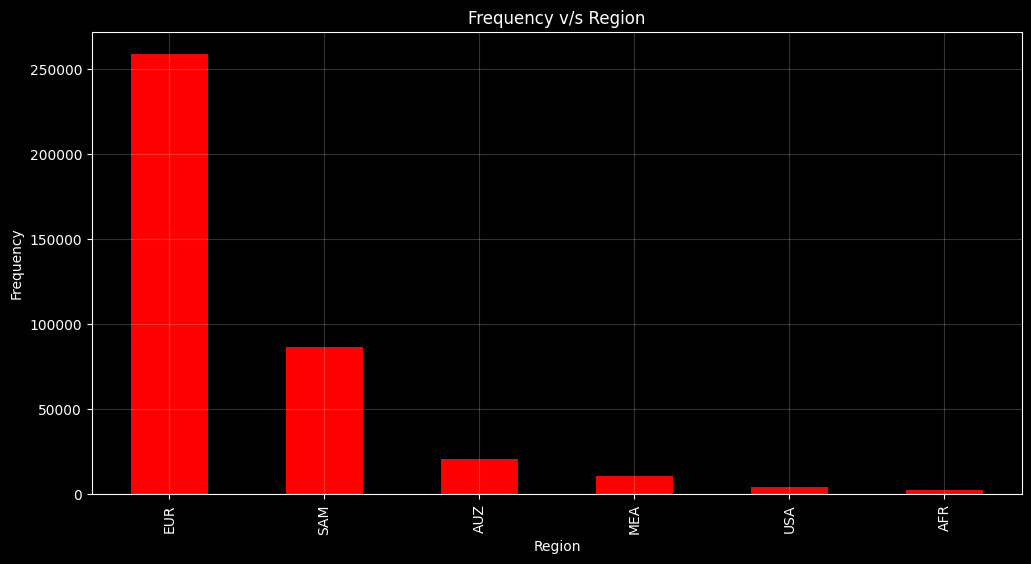

In [183]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
df['region'].value_counts().plot(kind='bar', color="red")
plt.title("Frequency v/s Region")
plt.xlabel("Region")
plt.ylabel("Frequency")
ax.grid(color='white', alpha=0.20)
plt.show()

#### Europe region has the highest count of sales

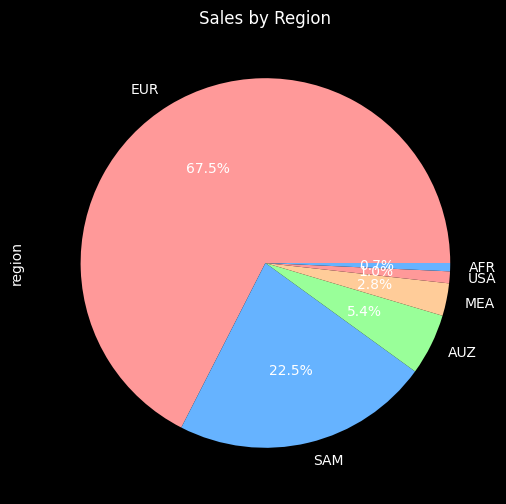

In [184]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
df['region'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Sales by Region');

Europe has the 67.5% of sales in dataset

### 2. Checking Industry Sales

In [185]:
df.customer_industry.unique()

array(['FMCG', 'Financial', 'Manufacturing ', 'Banking ', 'Construction',
       'Legal'], dtype=object)

In [186]:
df.customer_industry.value_counts()

FMCG              190214
Financial          55166
Legal              51458
Construction       36062
Manufacturing      33622
Banking            16978
Name: customer_industry, dtype: int64

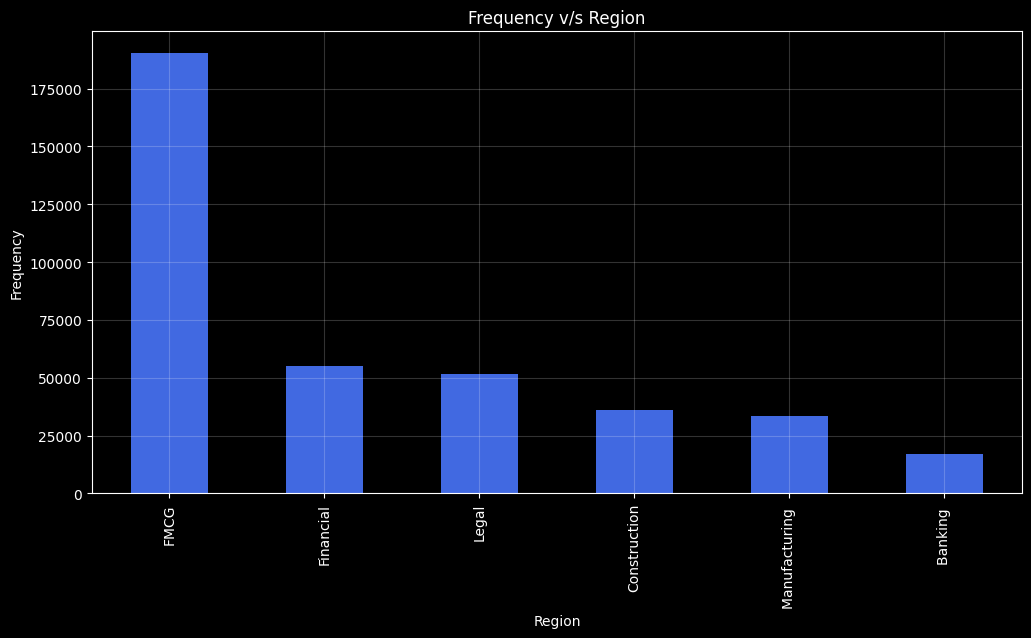

In [187]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
df.customer_industry.value_counts().plot.bar(color="royalblue")
plt.title("Frequency v/s Region")
plt.xlabel("Region")
plt.ylabel("Frequency")
ax.grid(color='white', alpha=0.20)

Fast Moving Consumer Goods (FMCG) sector has the Highest amount of sales count

### 3. Checking Item Category

In [188]:
df.item_category.unique()

array(['Tire', 'Axle', 'Drivetrain', 'Chains', 'Pedal', 'Saddle',
       'Bearing', 'Other'], dtype=object)

In [189]:
df.item_category.value_counts()

Axle          159556
Tire          158510
Other          35608
Drivetrain     10118
Bearing         9930
Chains          6282
Pedal           3140
Saddle           356
Name: item_category, dtype: int64

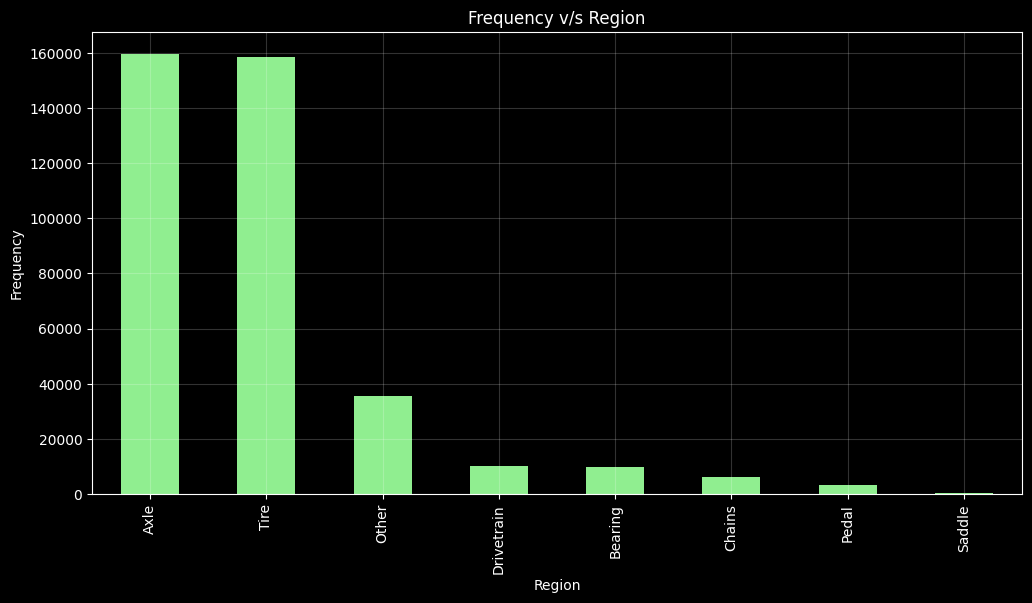

In [190]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
df.item_category.value_counts().plot.bar(color="lightgreen")
plt.title("Frequency v/s Region")
plt.xlabel("Region")
plt.ylabel("Frequency")
ax.grid(color='white', alpha=0.20)

Axle with 159,556 and Tire with 158,510 numbers of items sold

#### 4. Checking Transaction Type

In [191]:
#Total unique customer
len(df.customer_name.value_counts())

275

In [192]:
df.transcation_type.unique()

array(['STD', 'CRD', 'RTN'], dtype=object)

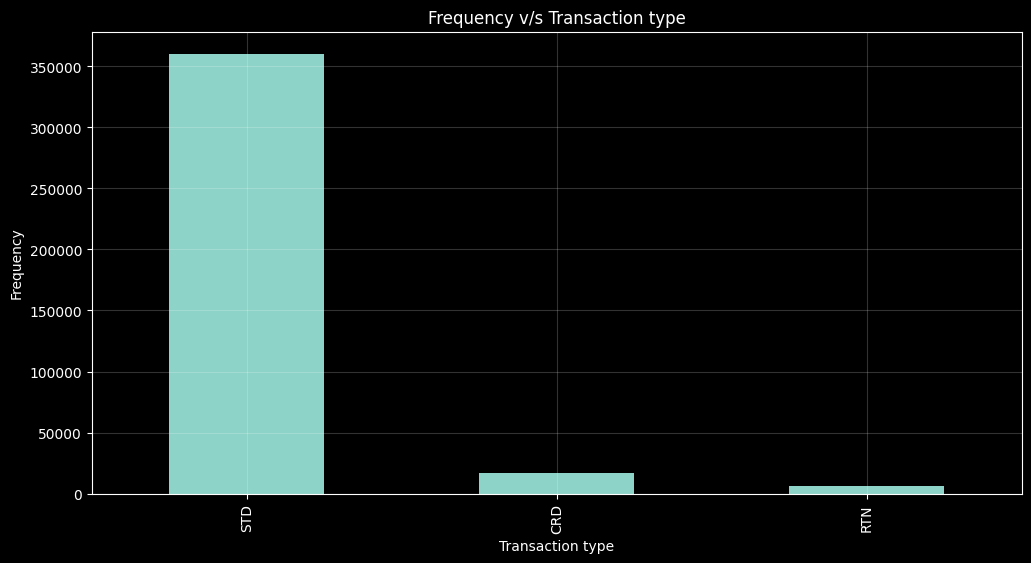

In [193]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
df.transcation_type.value_counts().plot.bar()
plt.title("Frequency v/s Transaction type")
plt.xlabel("Transaction type")
plt.ylabel("Frequency")
ax.grid(color='white', alpha=0.20)

In [203]:
df['transcation_type'].value_counts()

STD    360446
CRD     16732
RTN      6322
Name: transcation_type, dtype: int64

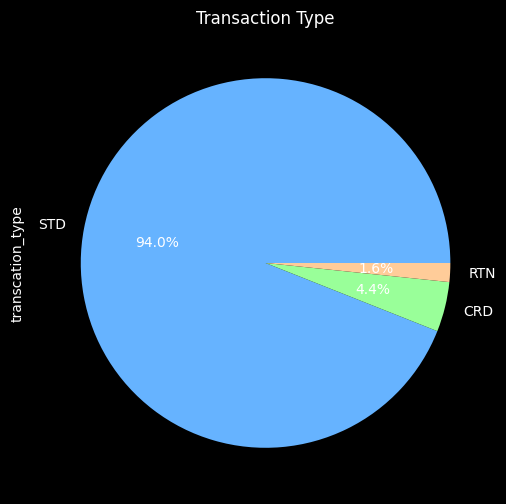

In [196]:
colors = ['#66b3ff','#99ff99','#ffcc99']
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
df['transcation_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Transaction Type');

94 percent of transaction are standard transction made during sale which are equivalent to 360,446

### 5. Item Range

In [200]:
df.item_range.value_counts()

Budget     166486
Mid        130186
Premium     86828
Name: item_range, dtype: int64

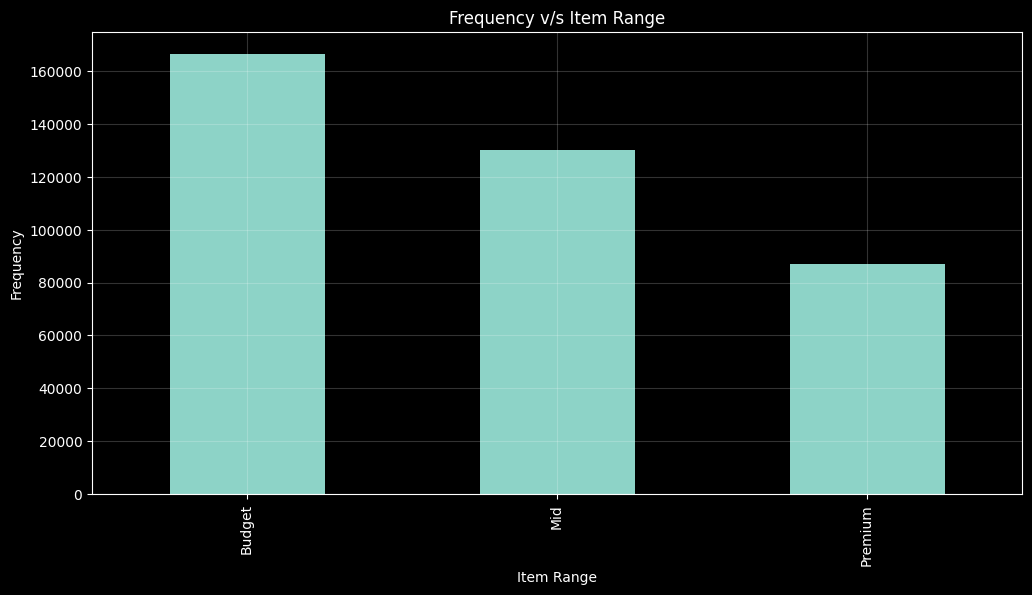

In [202]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
df.item_range.value_counts().plot.bar()
plt.title("Frequency v/s Item Range")
plt.xlabel("Item Range")
plt.ylabel("Frequency")
ax.grid(color='white', alpha=0.20)

Well, highest Budget range was 166,486. where Mid range of sales was 130,186. Lowest was the premium sales 86,828.